<a href="https://colab.research.google.com/github/leharikasri/Face-Identification-Verification/blob/main/Face_Identification_and_verification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mtcnn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.9 MB/s eta 0:00:00


In [ ]:
!pip install keras_facenet

  Preparing metadata (setup.py) ... done
  Created wheel for keras_facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10368 sha256=3edee28faa163d597a293c16b15e279f489cb3c056b9d2cc52a559063e5350ae
  Stored in directory: /root/.cache/pip/wheels/99/94/dd/cb1a65a7440ba6d508bd24346c15af0b1d24ff8b1cdb1c9959
Successfully built keras_facenet


In [ ]:
from mtcnn import MTCNN
from keras_facenet import FaceNet
import cv2 #opencv helping for image processing like reading or resizing images
import numpy as np # helps handle image data as arrays and does maths on it
import torch # to speed yp the process
import matplotlib.pyplot as plt # for data visualization
from scipy.spatial.distance import cosine # to calcilate the cosine didtance between two vectors
from skimage import io # for loading images from local paths or url
import warnings # for clear output
warnings.filterwarnings('ignore')# to ignore irrevalent warnings
plt.style.use('dark_background')


images loading

In [ ]:
image1_hal="/content/drive/MyDrive/Colab Notebooks/Football players/Haland/1.jpg"
image2_hal="/content/drive/MyDrive/Colab Notebooks/Football players/Haland/2.jpg"

image1_mbp="/content/drive/MyDrive/Colab Notebooks/Football players/Mbape/1.jpg"
image2_mbp="/content/drive/MyDrive/Colab Notebooks/Football players/Mbape/2.jpg"

image1_mess="/content/drive/MyDrive/Colab Notebooks/Football players/Messi/1.jpg"
image2_mess="/content/drive/MyDrive/Colab Notebooks/Football players/Messi/2.jpg"

image1_ney="/content/drive/MyDrive/Colab Notebooks/Football players/Neymar/1.jpg"
image2_ney="/content/drive/MyDrive/Colab Notebooks/Football players/Neymar/2.jpg"

image1_cr7="/content/drive/MyDrive/Colab Notebooks/Football players/Ronaldo/1.jpg"
image2_cr7="/content/drive/MyDrive/Colab Notebooks/Football players/Ronaldo/2.jpg"
img_list=[image1_hal,image2_hal,image1_mbp,image2_mbp,image1_mess,image2_mess,image1_ney,image2_ney,image1_cr7,image2_cr7]

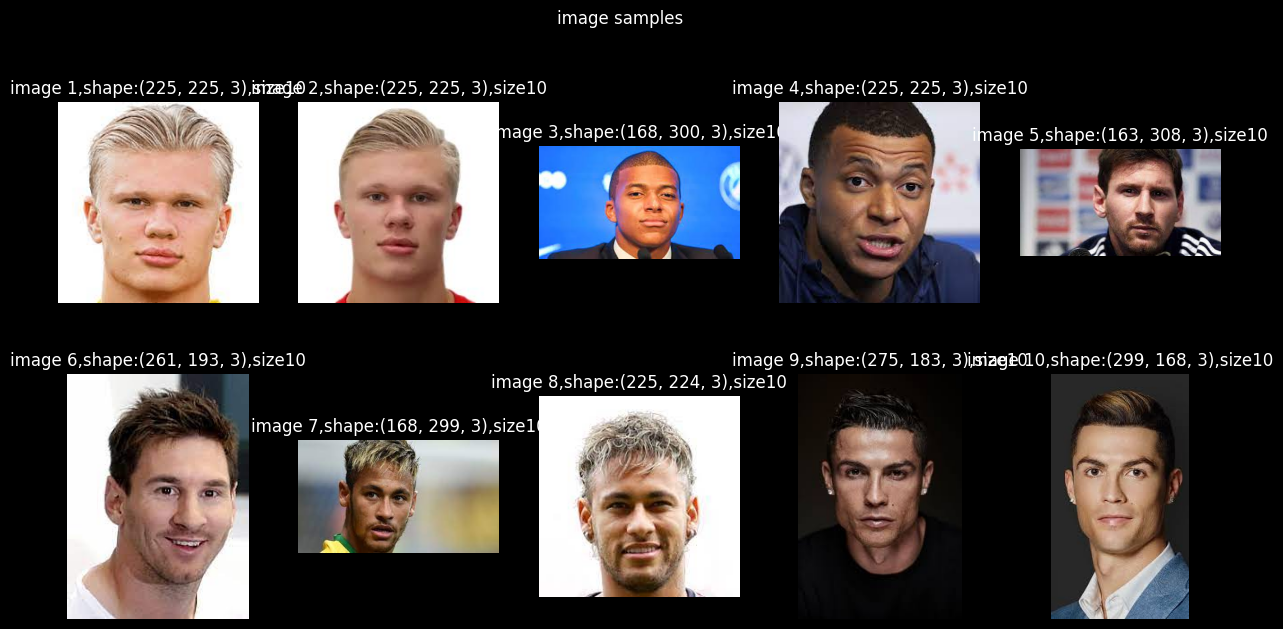

In [ ]:
plt.figure(figsize=(15,7))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.suptitle('image samples')
  img=plt.imread(img_list[i])
  plt.imshow(img)
  plt.axis("off")
  plt.title(f"image {i+1},shape:{img.shape},size10")

In [ ]:
class Color:
  GREEN='\033[92m'
  BLUE='\033[94m'
  RED='\033[91m'
  BOLD='\033[1m'
  END='\033[0m'

for detecting faces

In [ ]:
def face_detection(image=None,model=MTCNN(),color='red',url=None,size=10):
  print(f'{Color.BOLD}the process of face detection statr..')
  plt.style.use('dark_background')
  if url:
    img=io.imread(url)
  if image:
    img=plt.imread(image)
  model=model
  coordinates=model.detect_faces(img)

  plt.style.use("dark_background")
  plt.figure(figsize=(12,6))
  plt.subplot(1,2,1)
  plt.imshow(img)
  plt.title('Fcae detection')
  plt.axis('off')
  ax=plt.gca()
  for coordinate in coordinates:
    print('{}the box coordinates:{} {}\n{}the confidence:{} {}\nthe key points: {} {}'.format(Color.GREEN,Color.END,coordinate['box'],Color.RED,Color.END, coordinate['confidence'],Color.BLUE,Color.END,coordinate['keypoints']))

    x,y,width,height=coordinate['box']
    rect=plt.Rectangle((x,y),width,height,fill=False,color=color)
    ax.add_patch(rect)
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.title('key points')
  plt.axis('off')

  for coordinate in coordinates:
    left_eye=coordinate['keypoints']['left_eye']
    right_eye=coordinate['keypoints']['right_eye']
    nose=coordinate['keypoints']['nose']
    mouth_left=coordinate['keypoints']['mouth_left']
    mouth_right=coordinate['keypoints']['mouth_right']

    plt.scatter(left_eye[0],left_eye[1],color='Red',s=size)
    plt.scatter(right_eye[0],right_eye[1],color='Red',s=size)
    plt.scatter(nose[0],nose[1],color='Red',s=size)
    plt.scatter(mouth_left[0],mouth_left[1],color='Red',s=size)
    plt.scatter(mouth_right[0],mouth_right[1],color='Red',s=size)


  plt.show()
  print("--"*30)




In [ ]:
for img in img_list:
  face_detection(image=img,color='red',size=10)


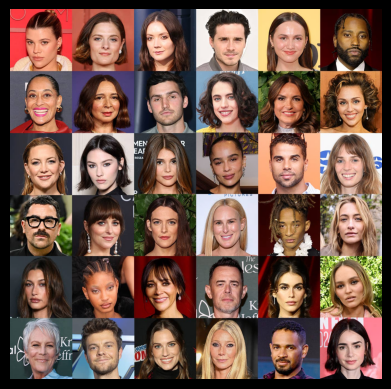

In [ ]:
url="https://img.buzzfeed.com/store-an-image-prod-us-east-1/u5usIabxZ.png?output-format=jpg&output-quality=auto"
image=io.imread(url)
plt.imshow(image)
plt.axis('off')
plt.show()

the process of face detection statr..
the box coordinates: [739, 42, 120, 158]
the confidence: 0.9999929070472717
the key points:  
the box coordinates: [510, 264, 115, 144]
the confidence: 0.9998147487640381
the key points:  
the box coordinates: [734, 938, 106, 152]
the confidence: 0.9997642040252686
the key points:  
the box coordinates: [1174, 936, 114, 146]
the confidence: 0.9996246695518494
the key points:  
the box coordinates: [57, 704, 116, 158]
the confidence: 0.9994610548019409
the key points:  
the box coordinates: [56, 60, 109, 151]
the confidence: 0.9994179010391235
the key points:  
the box coordinates: [278, 507, 112, 145]
the confidence: 0.9992983341217041
the key points:  
the box coordinates: [962, 271, 99, 142]
the confidence: 0.9990724325180054
the key points:  
the box coordinates: [1192, 34, 110, 157]
the confidence: 0.9985489249229431
the key points:  
the box coordinates: [290, 47, 107, 150]
the confidence: 0.9972789287567139
the key points:  
the box coordinat

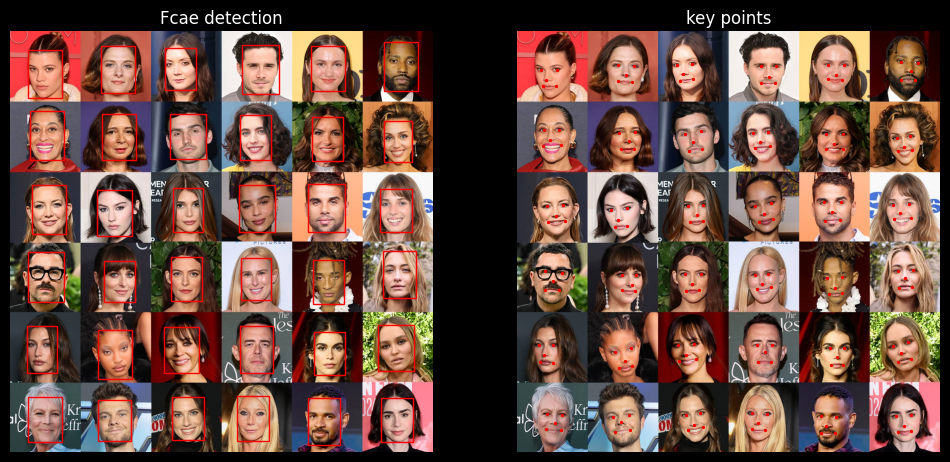

------------------------------------------------------------


In [ ]:
face_detection(url=url,size=2)

In [ ]:
def reading_img(img_path):
  img=cv2.imread(img_path)
  image=cv2.cvtColor(img,code=cv2.COLOR_BGR2RGB)
  return image


In [ ]:
def face_detection_facenet(image,margin=0.2):
  model=MTCNN()
  detection=model.detect_faces(image)

  if detection:
    x,y,width,height=detection[0]['box']
    margin=margin
    x_min,y_min=max(x-int(margin*width),0),max(y-int(margin*height),0)
    x_max,y_max=min(x+width+int(margin*width),image.shape[1]),min(y+height+int(margin*height),image.shape[0])

    face_box=image[y_min:y_max,x_min:x_max]

    image_with_face_detection=cv2.resize(face_box,(160,160))
    return image_with_face_detection
  else:
    return None



In [ ]:
def embedding(image_with_face_detection):
  model=FaceNet()
  embedding_vector=model.embeddings([image_with_face_detection])[0]
  return embedding_vector

In [ ]:
def similarity(embedding_vector1,embedding_vector2,threshold=0.7):
  distance=cosine(embedding_vector1,embedding_vector2)
  scan_distance= distance<threshold
  return scan_distance

In [ ]:
def comparison_faces(image1,image2):
  image1=reading_img(image1)
  image2=reading_img(image2)

  face1=face_detection_facenet(image=image1,margin=0.2)
  face2=face_detection_facenet(image=image2,margin=0.2)

  if face1 is not None and face2 is not None:
    plt.style.use('dark_background')
    plt.figure(figsize=(12,6))
    plt.suptitle('face comparison')

    plt.subplot(1,2,1)
    plt.imshow(face1)
    plt.title(f'image1: \nthe shape(face1.shape)')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(face2)
    plt.title(f'image2: \nthe shape(face2.shape)')
    plt.axis('off')

    plt.show()

    embed1=embedding(face1)
    embed2=embedding(face2)

    return similarity(embed1,embed2)
  else:
    return None



In [ ]:
def showing(image_path1,image_path2):
  print(f'{Color.BOLD} the process for face comparison is started...')

  checking = comparison_faces(image_path1,image_path2)

  if checking:
    print(f'result:{Color.GREEN} the person in both images is the {Color.BOLD} same{Color.END}')
  else:
    print(f'result:{Color.RED} the person in both images is not  the {Color.BOLD}same{Color.END}')

  print('-- '*40)

 the process for face comparison is started...


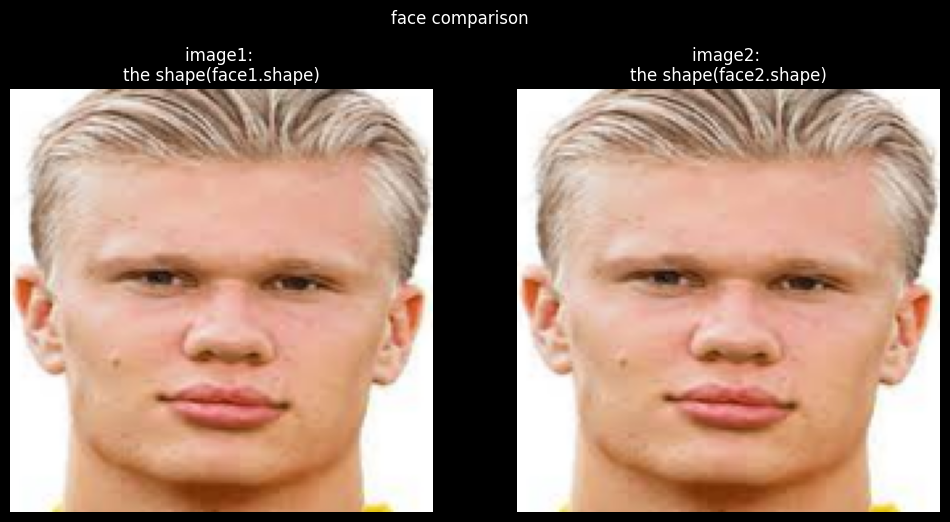

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
result: the person in both images is the  same
-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
 the process for face comparison is started...


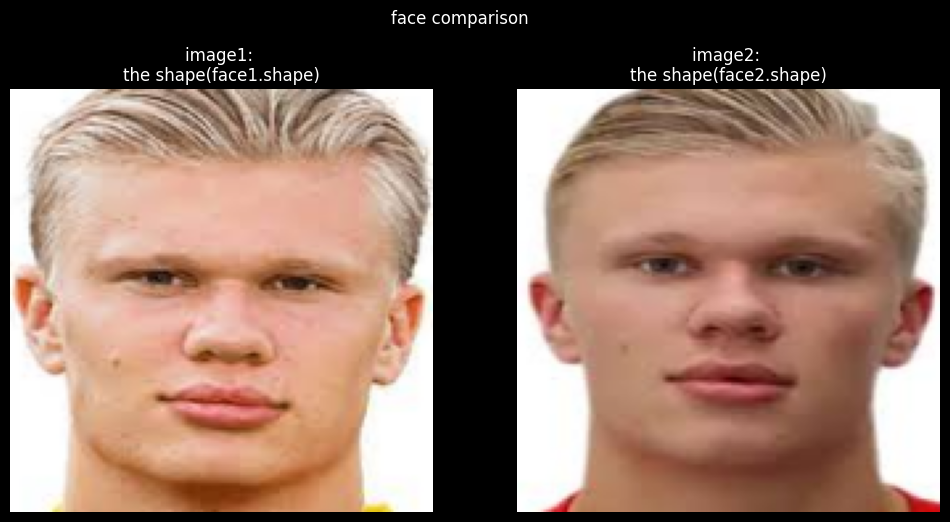

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
result: the person in both images is the  same
-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
 the process for face comparison is started...


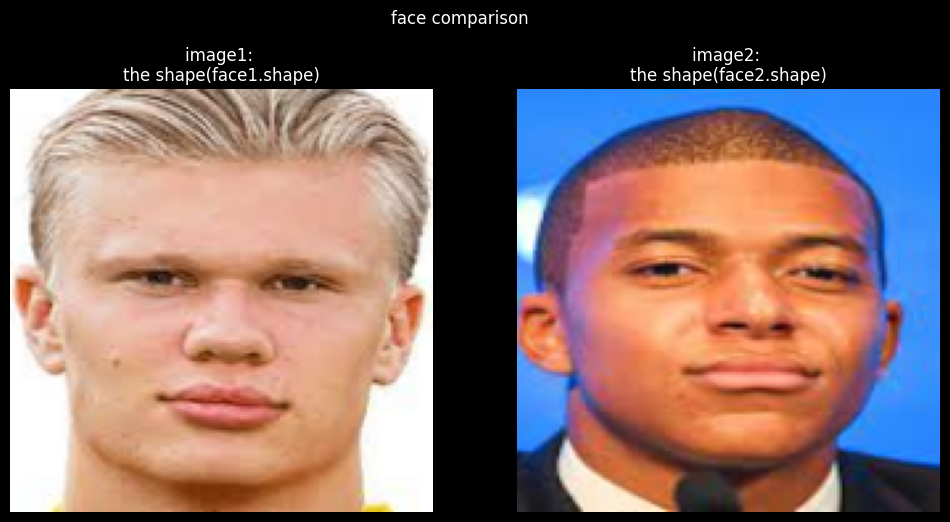

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
result: the person in both images is not  the same
-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
 the process for face comparison is started...


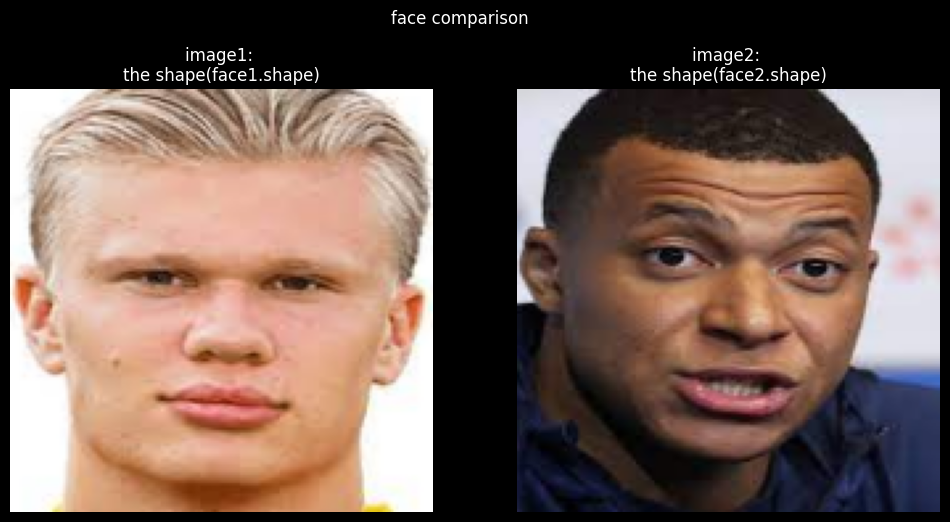

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
result: the person in both images is not  the same
-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
 the process for face comparison is started...


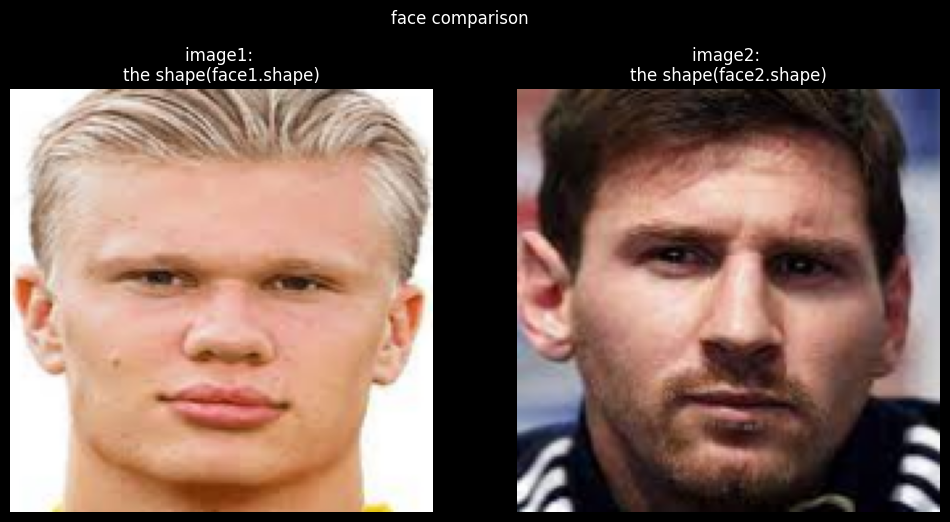

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
result: the person in both images is not  the same
-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
 the process for face comparison is started...


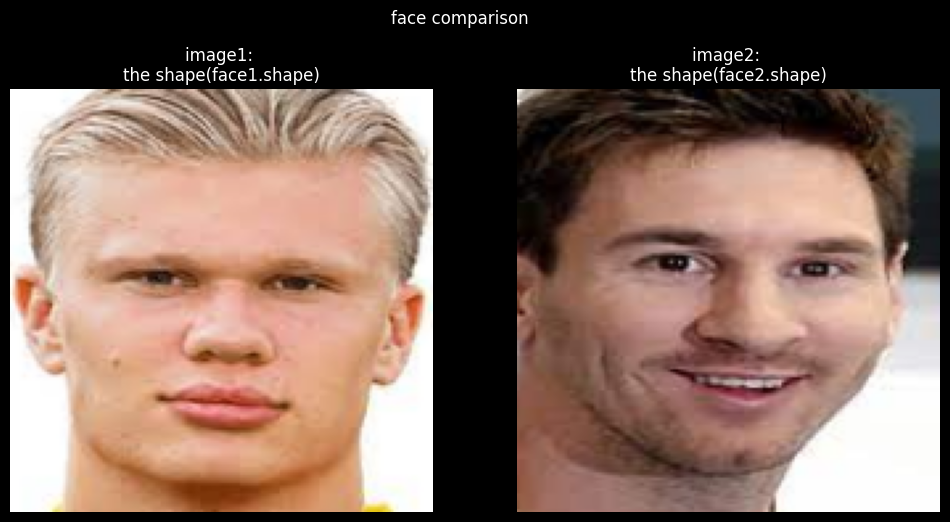

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
result: the person in both images is not  the same
-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
 the process for face comparison is started...


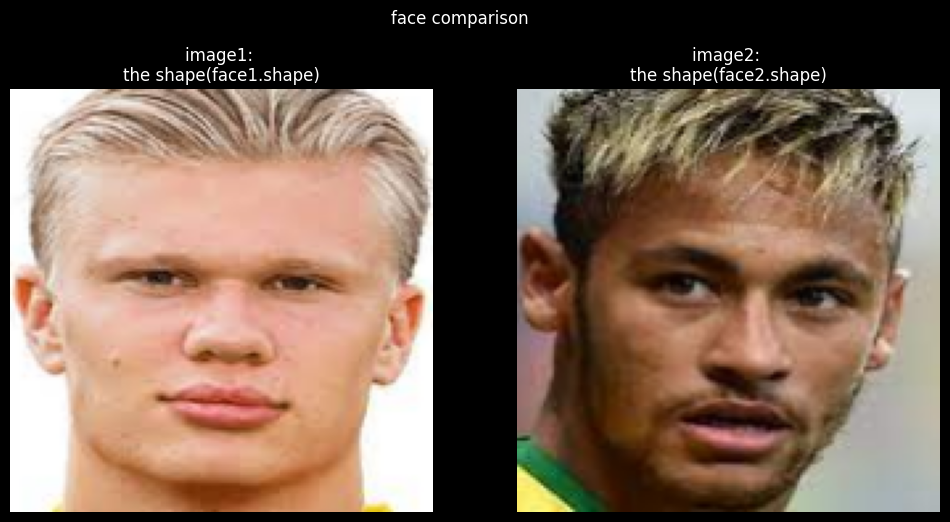

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
result: the person in both images is not  the same
-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
 the process for face comparison is started...


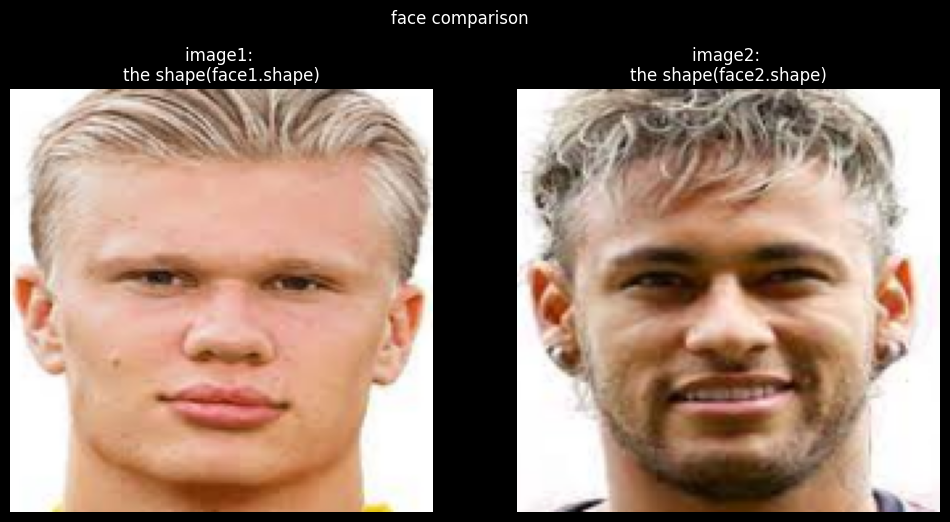

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
result: the person in both images is not  the same
-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
 the process for face comparison is started...


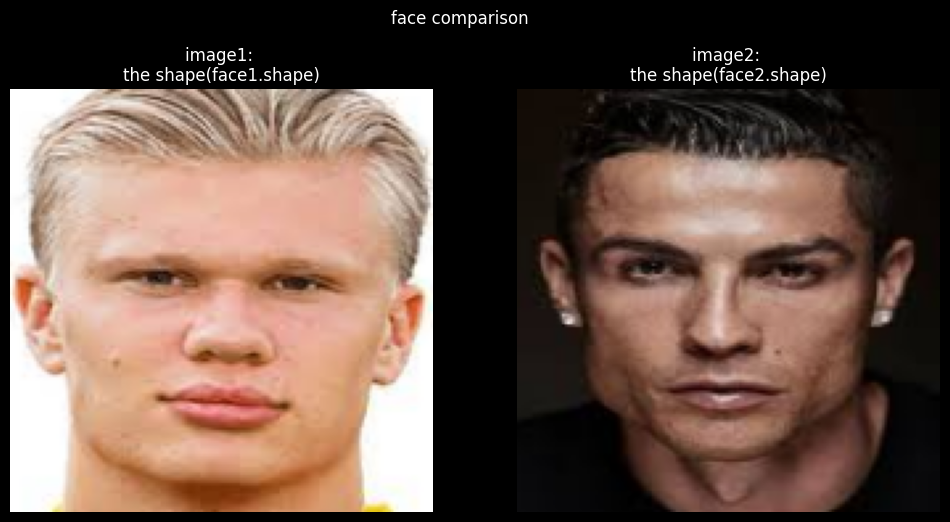

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
result: the person in both images is not  the same
-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
 the process for face comparison is started...


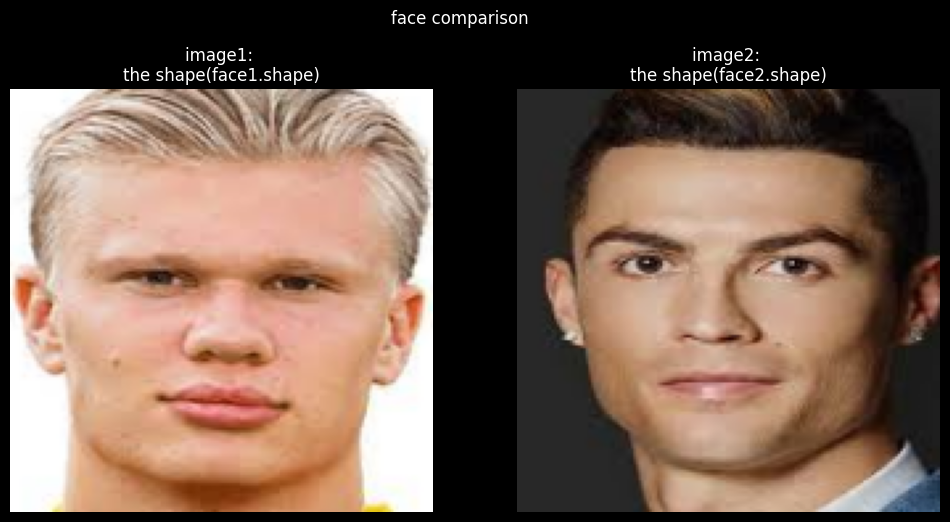

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
result: the person in both images is not  the same
-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 


In [ ]:
for img in img_list:
  showing(img_list[0],img)
